In [103]:
# ! pip3 uninstall torch torchvision torchaudio -y
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [104]:
# 파이썬 버전
import sys
sys.version

'3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.3.9.4)]'

In [105]:
import torch
torch.__version__


'2.3.1'

In [106]:
! pip3 install pandas scikit-learn matplotlib seaborn
! pip3 install torchtext
! pip3 install transformers
! pip3 install sentencepiece
! pip3 install torchsummary

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [108]:

df = pd.read_csv("./data/bsmax_0_1", sep='\t')
print(df.head())
print(df.shape)

     ymd    init   rtn     avg   dev  bkmax  skmax  bomega  somega   bpri  \
0  90323  192333  -500  192670  1452     12     14  -0.002   0.002 -0.277   
1  90324  192562 -4848  187788  1542      5      6   0.020   0.039 -0.385   
2  90325  188812 -2098  187049   574      4      7   0.001   0.001 -0.179   
3  90326  186556   944  187753   517      6      8   0.001  -0.001 -0.323   
4  90327  187794 -2982  185802   756     10     10  -0.001   0.001 -0.402   

   ...   spri      sfor      smom      sc    spmax    smax   smomn    scn  \
0  ... -0.267  3284.428   412.228   9.682  315.230  23.000  10.655  0.052   
1  ... -0.404  6665.924  1028.882   8.776  721.892  30.500  10.915  0.032   
2  ... -0.228  2723.411   315.232  11.061  151.065  19.429   9.821  0.065   
3  ... -0.205  1627.165   208.041   8.732  216.675  23.125   8.048  0.056   
4  ... -0.129  2233.416   208.066  11.381   91.132  22.300   7.397  0.073   

     spmaxn  smaxn  
0  1293.851  0.000  
1  1239.855  6.333  
2   945.091

In [109]:
# 이 함수는 시퀀스 데이터를 생성합니다.
# 예를 들어, 시퀀스 길이가 3이고 데이터가 [1, 2, 3, 4, 5]인 경우
# 입력 시퀀스는 [1, 2, 3], [2, 3, 4]가 되고
# 타겟 시퀀스는 [4], [5]가 됩니다.

def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return torch.FloatTensor(sequences), torch.FloatTensor(targets)




In [110]:
seq_length = 10  # 시퀀스 길이
# 시퀀스 데이터 생성
data = df.values
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data)
sequences, targets = create_sequences(data_normalized, seq_length)
print(sequences, targets)



tensor([[[-1.0000e+00, -2.6421e-01,  2.4238e-01,  ..., -4.4330e-01,
           1.4610e-02, -1.0000e+00],
         [-9.9998e-01, -2.6226e-01,  1.0982e-01,  ..., -8.5567e-01,
          -3.1499e-02, -1.0941e-01],
         [-9.9996e-01, -2.9422e-01,  1.9366e-01,  ..., -1.7526e-01,
          -2.8321e-01, -1.0000e+00],
         ...,
         [-9.9827e-01, -3.2671e-01,  2.7287e-01,  ..., -4.6392e-01,
          -6.0941e-02, -9.3503e-01],
         [-9.9825e-01, -3.1776e-01,  2.7134e-01,  ..., -5.0515e-01,
          -1.0024e-01, -9.5978e-01],
         [-9.9823e-01, -3.2214e-01,  2.1079e-01,  ..., -5.1546e-02,
          -4.6647e-01, -9.8439e-01]],

        [[-9.9998e-01, -2.6226e-01,  1.0982e-01,  ..., -8.5567e-01,
          -3.1499e-02, -1.0941e-01],
         [-9.9996e-01, -2.9422e-01,  1.9366e-01,  ..., -1.7526e-01,
          -2.8321e-01, -1.0000e+00],
         [-9.9993e-01, -3.1344e-01,  2.8640e-01,  ..., -3.6082e-01,
          -4.4391e-01, -1.0000e+00],
         ...,
         [-9.9825e-01, -3

In [111]:

# 데이터를 학습 데이터와 테스트 데이터로 나눕니다.
# 학습 데이터: 80%, 테스트 데이터: 20%
# 시퀀스 데이터는 순서가 있는 데이터이므로 순서를 유지하면서 나누어야 합니다.
# 이를 위해 shuffle=False로 설정합니다.
train_sequences, test_sequences, train_targets, test_targets = train_test_split(
    sequences, targets, test_size=0.2, shuffle=False)

In [112]:
# 3. 모델 정의
# LSTM 모델 정의
# LSTM 모델은 nn.LSTM을 사용합니다.
# nn.LSTM의 첫 번째 인수는 입력 특성의 크기입니다.
# 여기서는 시퀀스 길이가 10이므로 입력 특성의 크기는 10이 됩니다.
# 두 번째 인수는 은닉 상태의 크기입니다.
# 세 번째 인수는 LSTM의 층 수입니다.
# 네 번째 인수는 출력 특성의 크기입니다.
# 여기서는 출력 특성의 크기는 1이 됩니다.
# LSTM 모델의 출력 크기는 (배치 크기, 시퀀스 길이, 출력 특성의 크기)가 됩니다.
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [113]:
input_size = train_sequences.shape[2]
hidden_size = 50
num_layers = 2
output_size = train_targets.shape[1]
# LSTM 모델 생성
# input_size: 입력 특성의 크기
# hidden_size: 은닉 상태의 크기
# num_layers: LSTM의 층 수
# output_size: 출력 특성의 크기
# 모델을 GPU로 이동
# 은닉 상태란 LSTM의 출력이자 다음 시점의 LSTM 입력으로 사용되는 값입니다.
# layer 수는 LSTM이 얼마나 깊게 쌓이는지를 의미합니다.
model = LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

In [114]:
# 4. 모델 학습
# 손실 함수와 최적화 알고리즘 정의
# MSELoss 클래스는 평균 제곱 오차를 계산하는 클래스입니다.
# 손실 함수는 평균 제곱 오차(MSE)를 사용합니다.
# 최적화 알고리즘은 Adam을 사용합니다.
# 학습률은 0.001로 설정합니다.
# Adam은 모멘텀과 RMSProp을 합친 최적화 알고리즘입니다.
# 모멘텀은 SGD의 속도를 빠르게 하는 기법입니다.
# RMSProp은 학습률을 동적으로 조절하는 기법입니다.
# Adam은 모멘텀과 RMSProp을 합친 것으로 이해하면 됩니다.
# Adam의 두 번째 인수는 학습률입니다.
# 학습률은 학습 속도를 의미합니다.
# 학습률이 너무 크면 발산하고, 너무 작으면 학습이 느려집니다.
# Adam의 세 번째 인수는 가중치 감소입니다.
# 가중치 감소는 오버피팅을 방지하기 위한 기법입니다.
# 오버피팅은 학습 데이터에만 잘 맞는 모델이 학습 데이터에만 잘 맞지 않는 현상을 의미합니다.
# 오버피팅을 방지하기 위해 가중치 감소를 사용합니다.
# 가중치 감소는 가중치가 커지지 않도록 제약을 가하는 기법입니다.
# Adam의 네 번째 인수는 모멘텀입니다.
# 모멘텀은 SGD의 속도를 빠르게 하는 기법입니다.
# Adam의 다섯 번째 인수는 학습률 감소입니다.
# 학습률 감소는 학습률을 동적으로 조절하는 기법입니다.
# 학습률 감소는 학습률을 점점 줄여가면서 학습 속도를 조절하는 기법입니다.
# Adam의 여섯 번째 인수는 epsilon입니다.
# epsilon은 0으로 나누는 것을 방지하기 위한 값입니다.

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [115]:
# 학습 데이터를 모델에 입력하고 손실을 계산합니다.
# 손실을 계산한 후, 손실을 사용해 모델을 학습합니다.
# 학습은 optimizer.step()으로 수행합니다.
# optimizer.zero_grad()는 optimizer의 그래디언트를 초기화하는 함수입니다.
# 그래디언트는 optimizer.step()에서 사용됩니다.
# optimizer.step()은 그래디언트를 사용해 가중치를 업데이트하는 함수입니다.
# optimizer.step()은 optimizer.zero_grad() 다음에 사용합니다.
# optimizer.zero_grad()는 optimizer.step() 다음에 사용합니다.
# optimizer.zero_grad()는 그래디언트를 초기화하는 함수입니다.
# optimizer.zero_grad()는 optimizer.step()에서 사용됩니다.
# optimizer.step()은 그래디언트를 사용해 가중치를 업데이트하는 함수입니다.
# optimizer.step()은 optimizer.zero_grad() 다음에 사용합니다.
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_sequences)
    loss = criterion(outputs, train_targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
# Epoch는 학습 횟수를 의미합니다.
# num_epochs는 학습 횟수를 의미합니다.
# model.train()은 모델을 학습 모드로 설정하는 함수입니다.
# Loss는 손실을 의미합니다.
# criterion은 손실 함수를 의미합니다.
# outputs는 모델의 출력을 의미합니다.
# train_sequences는 학습 데이터의 입력 시퀀스를 의미합니다.
# Loss 3067167744.0000 은 큰 값입니다.
# 이는 학습이 잘 되지 않았음을 의미합니다.


Epoch [10/100], Loss: 0.2281
Epoch [20/100], Loss: 0.1009
Epoch [30/100], Loss: 0.0772
Epoch [40/100], Loss: 0.0746
Epoch [50/100], Loss: 0.0711
Epoch [60/100], Loss: 0.0667
Epoch [70/100], Loss: 0.0628
Epoch [80/100], Loss: 0.0600
Epoch [90/100], Loss: 0.0588
Epoch [100/100], Loss: 0.0582


In [116]:
# 모델 평가
model.eval()
with torch.no_grad():
    test_outputs = model(test_sequences)
    test_loss = criterion(test_outputs, test_targets)
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 0.0746


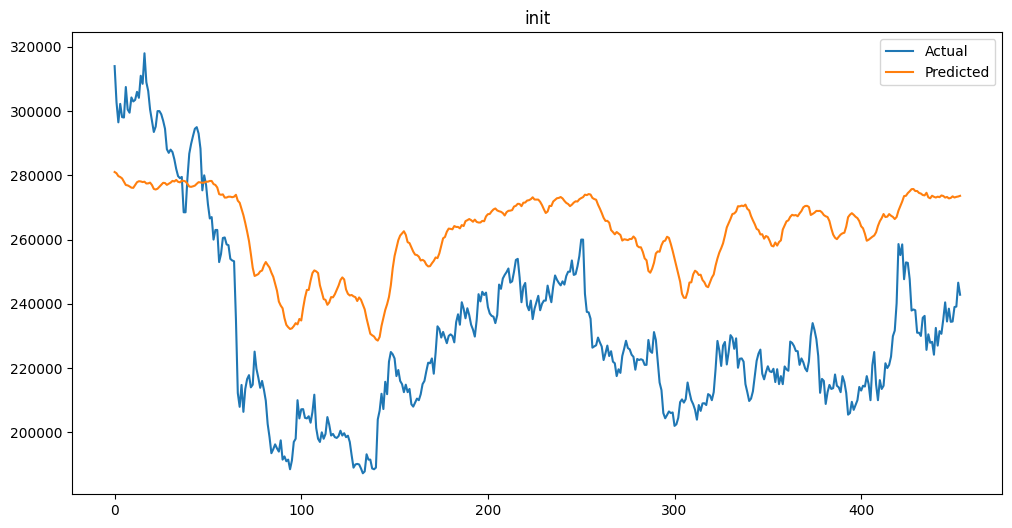

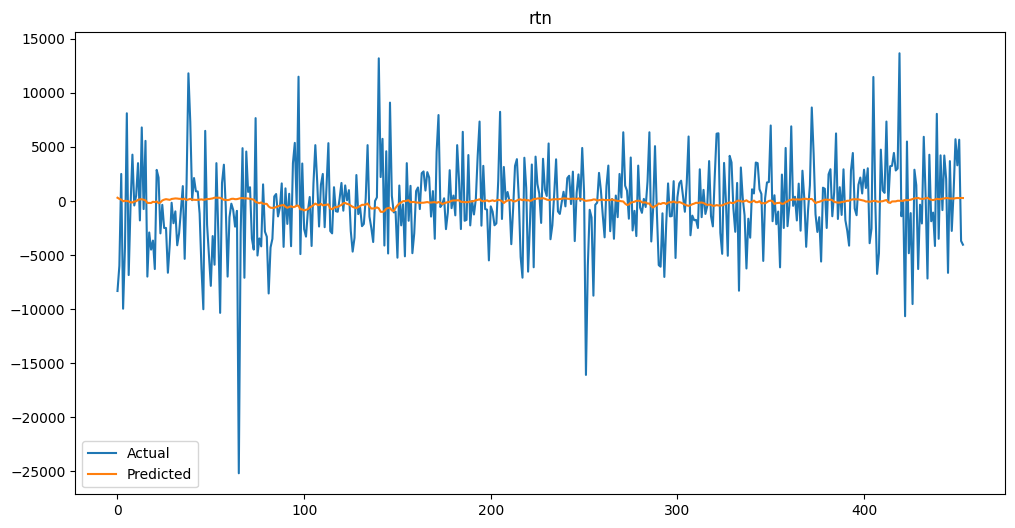

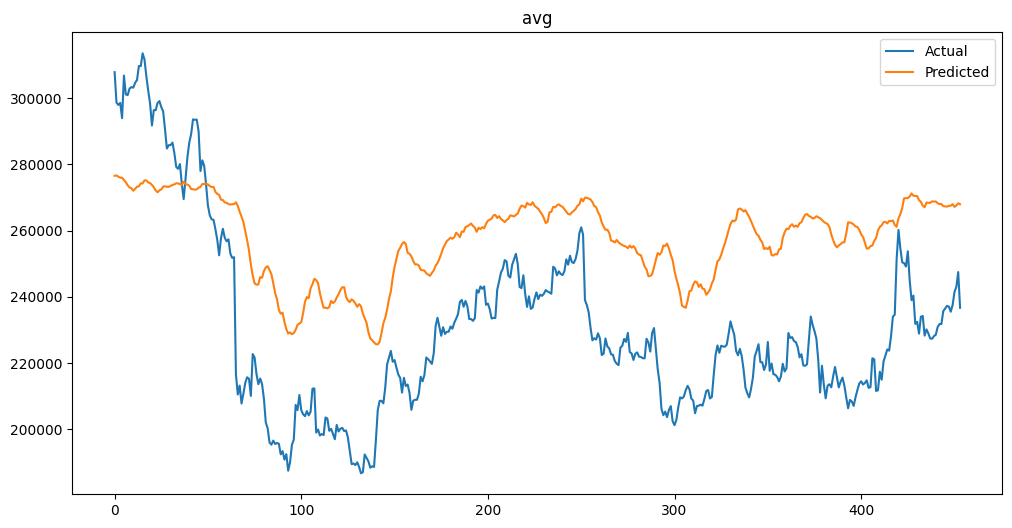

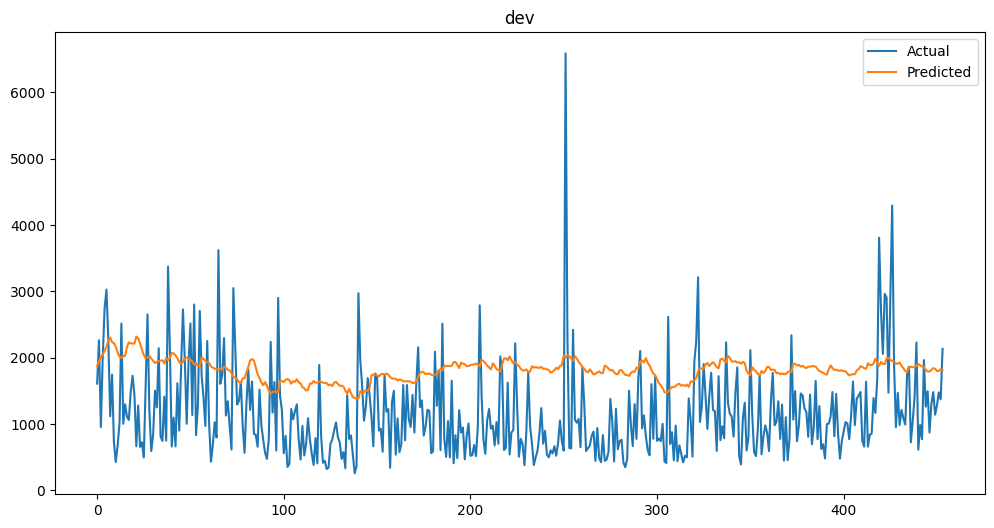

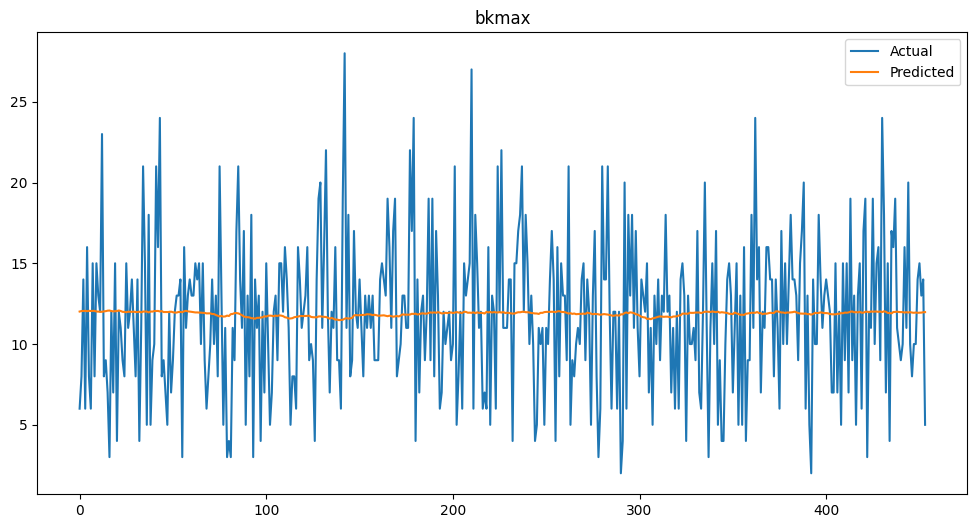

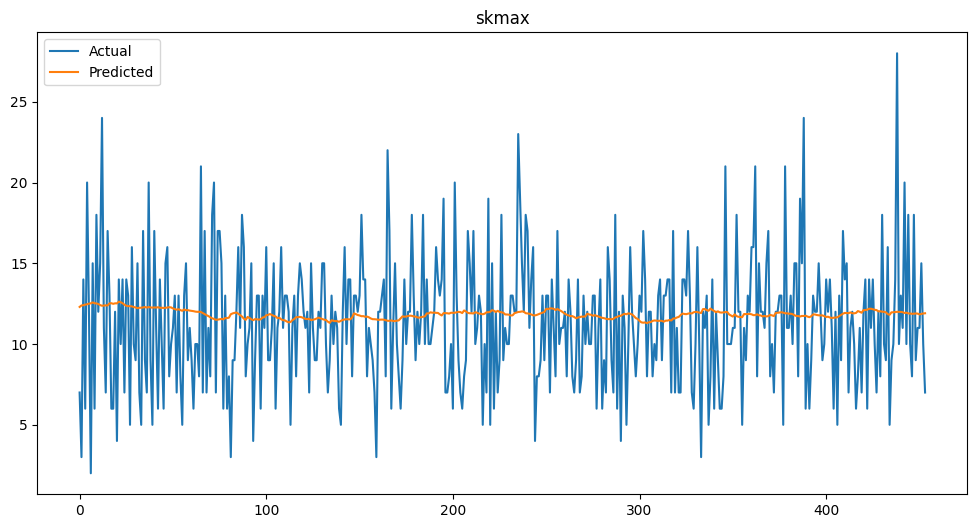

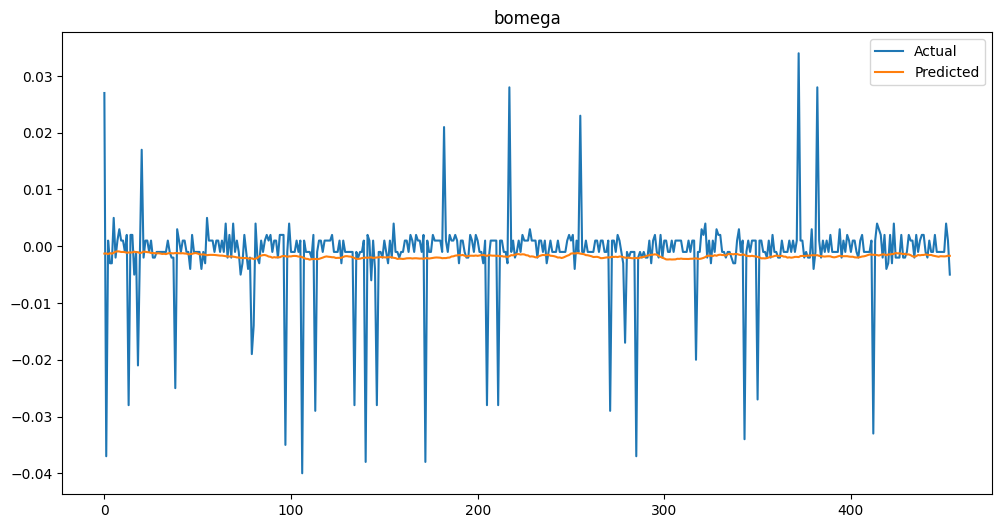

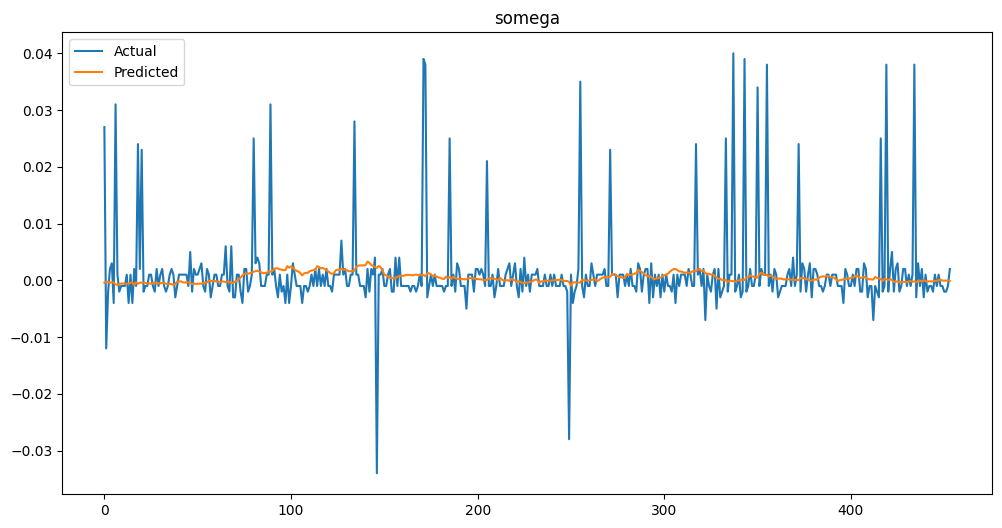

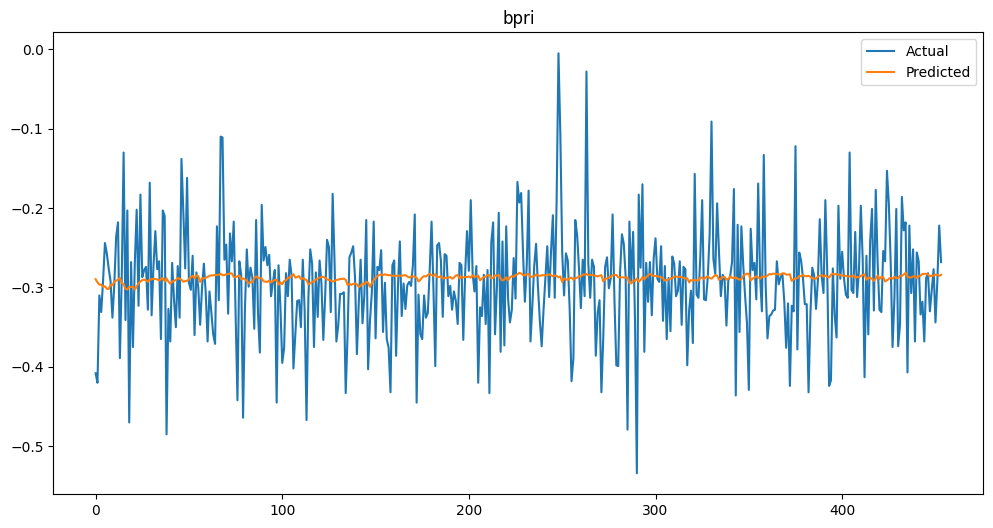

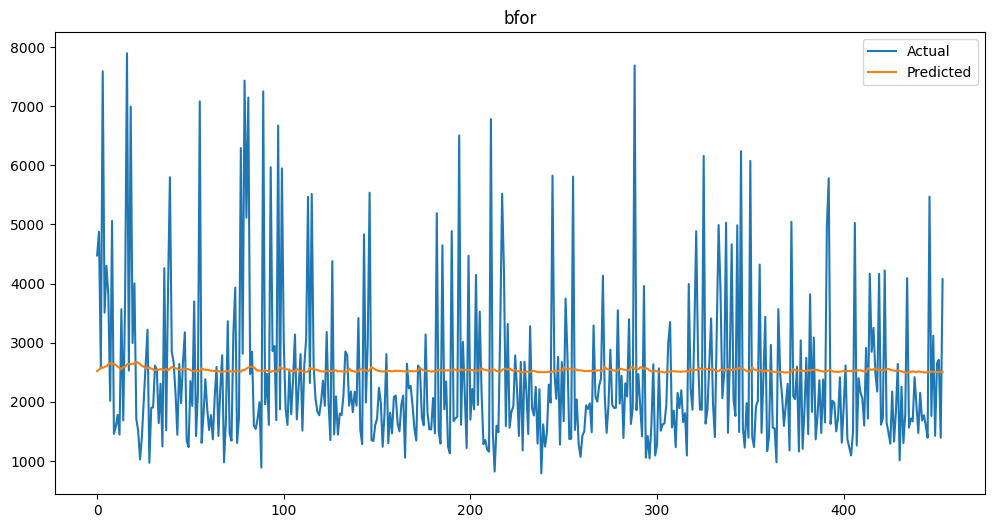

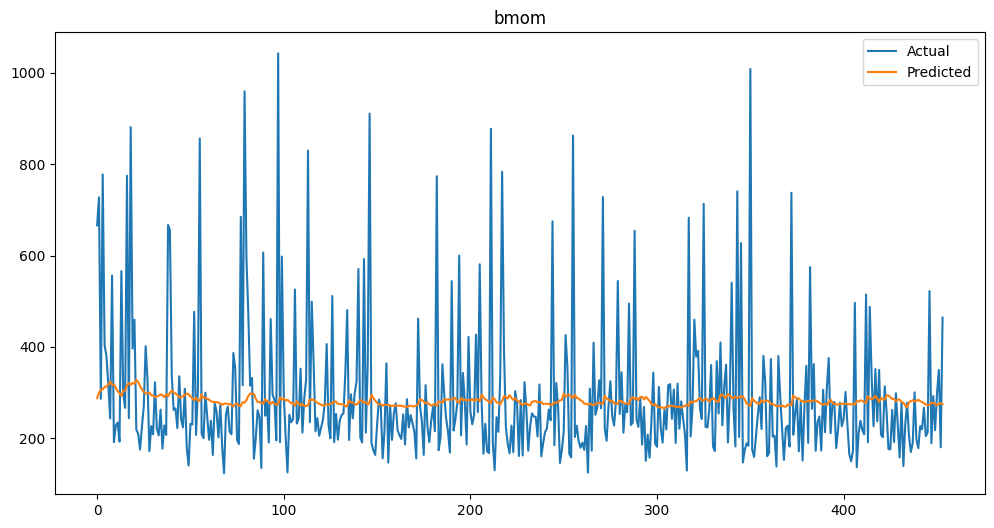

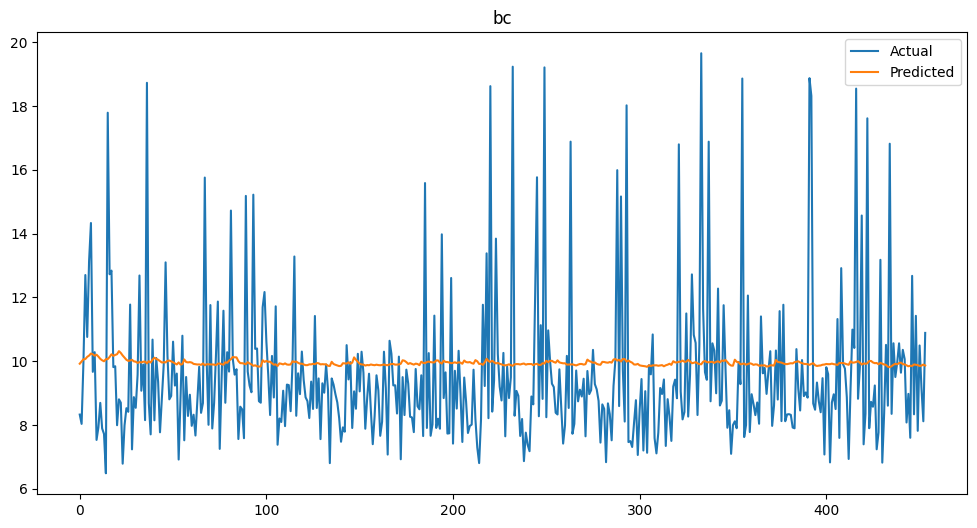

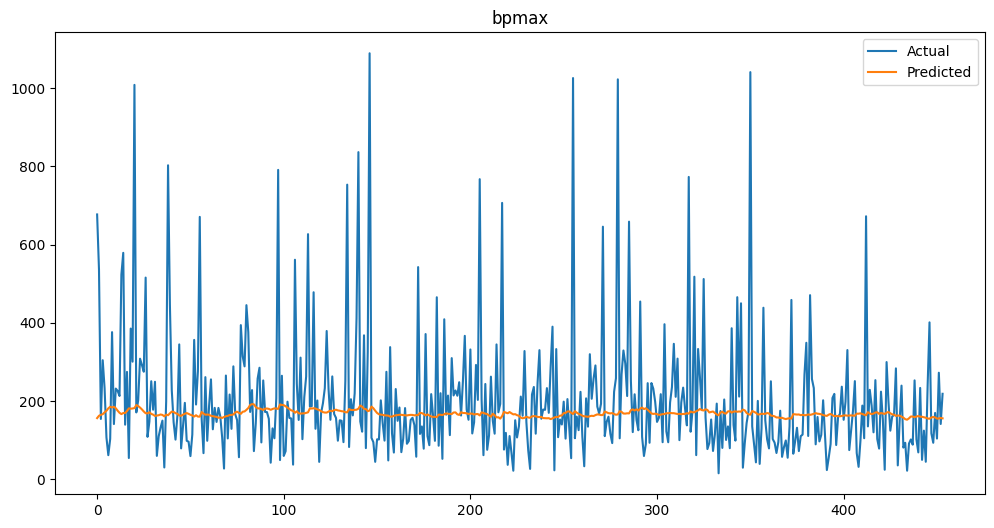

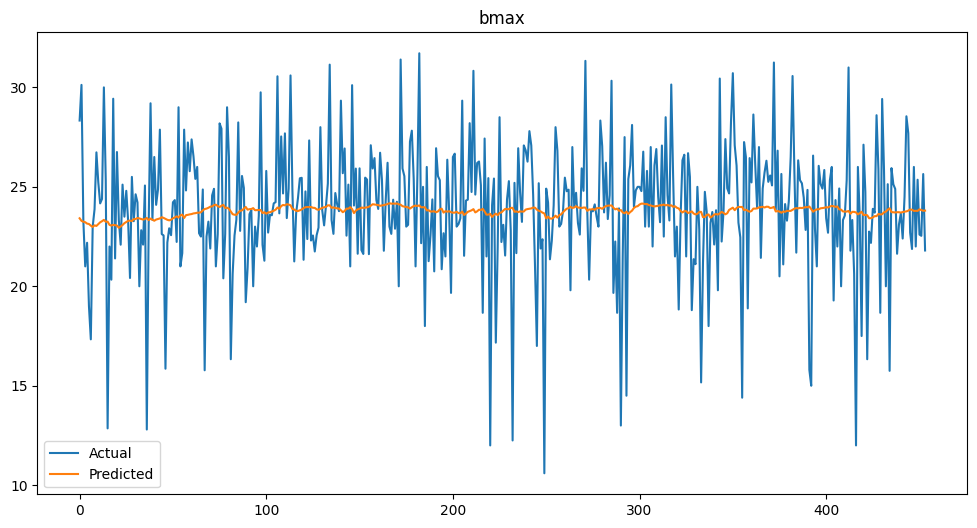

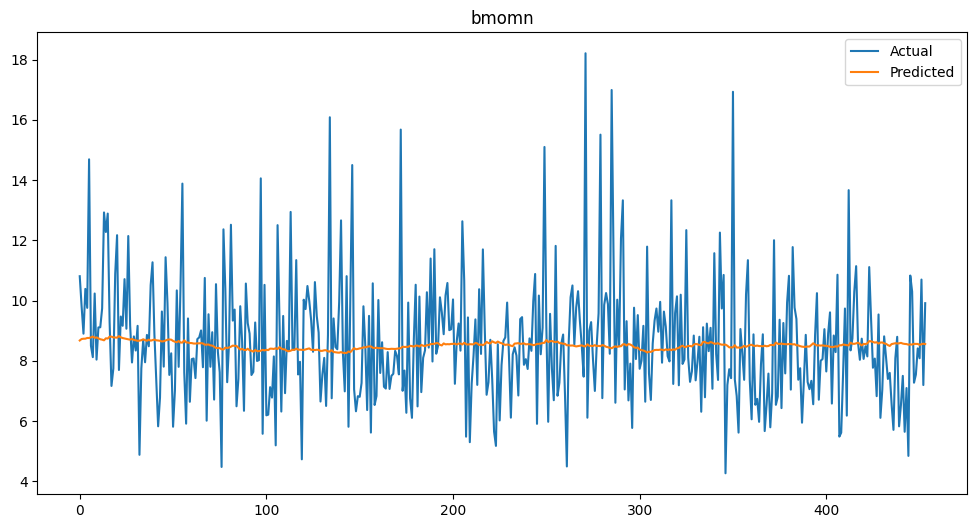

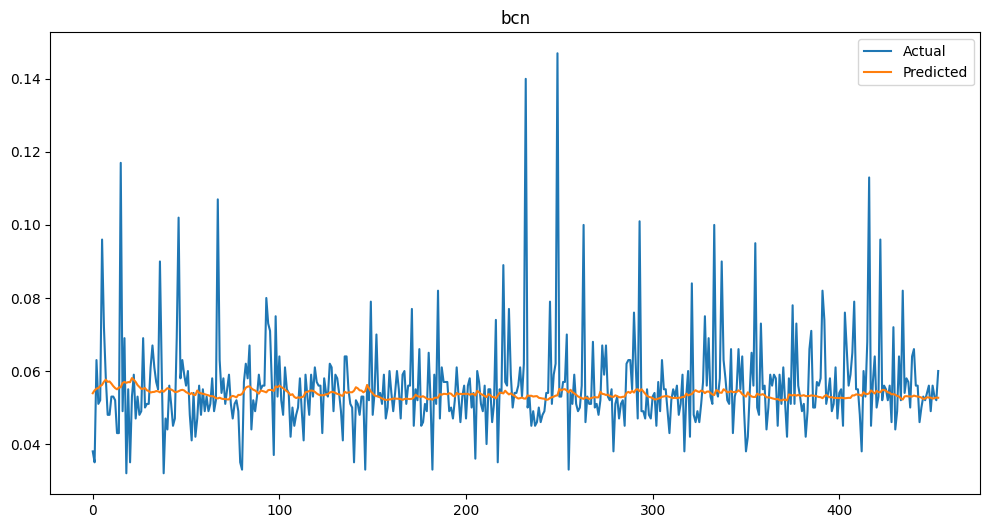

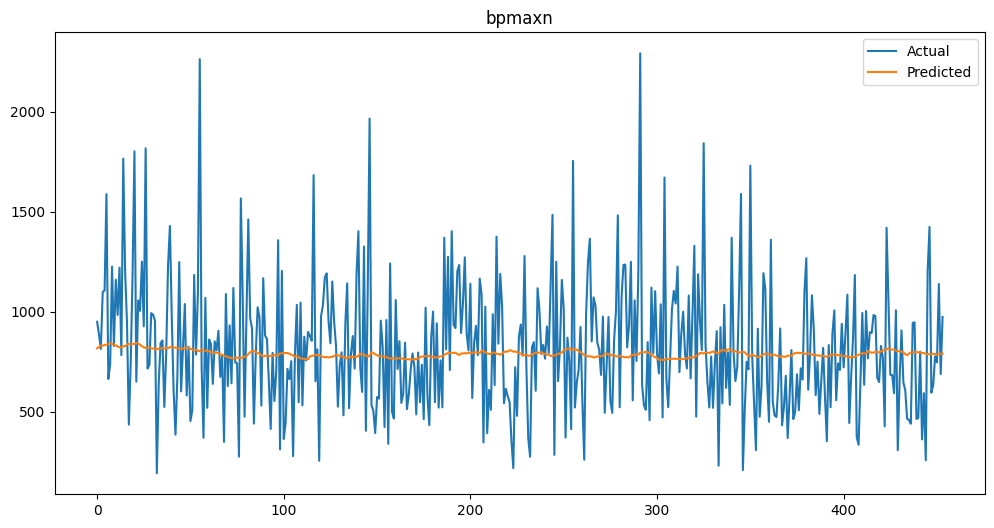

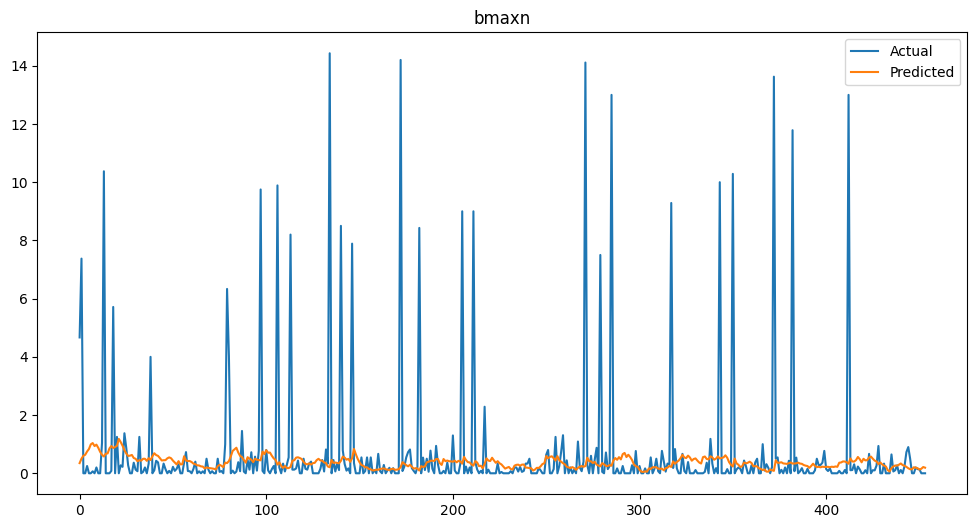

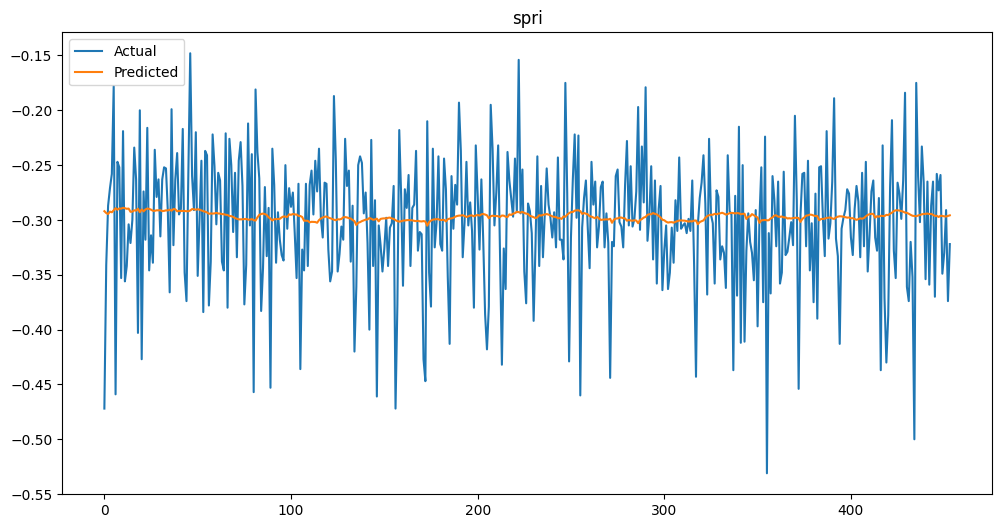

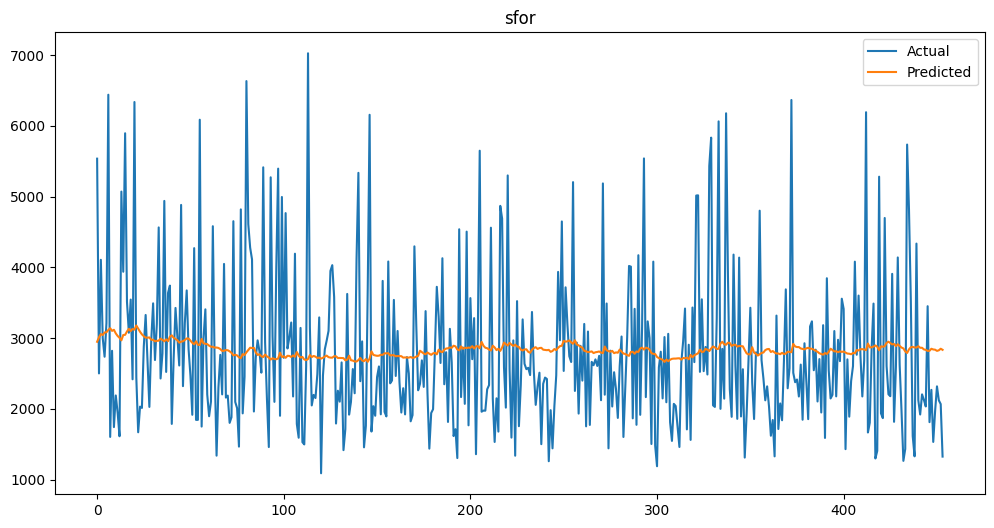

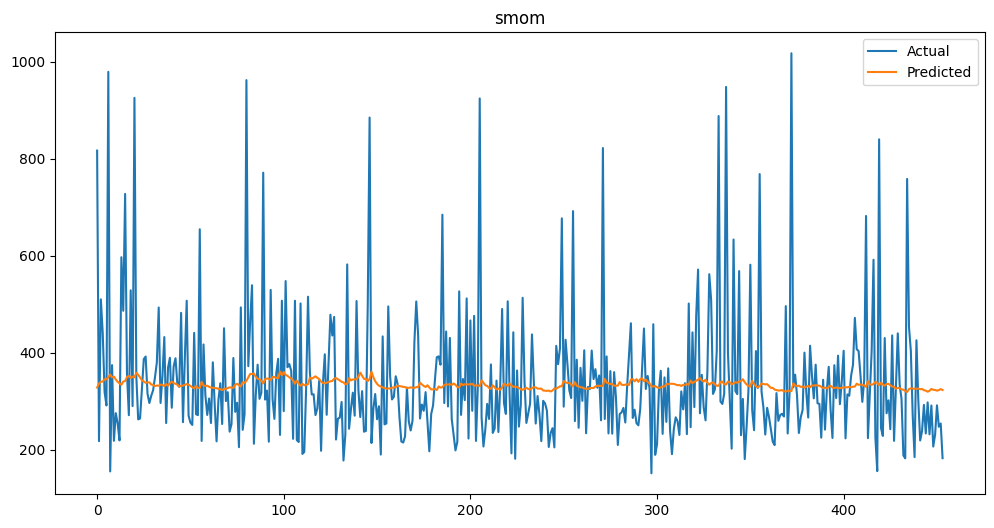

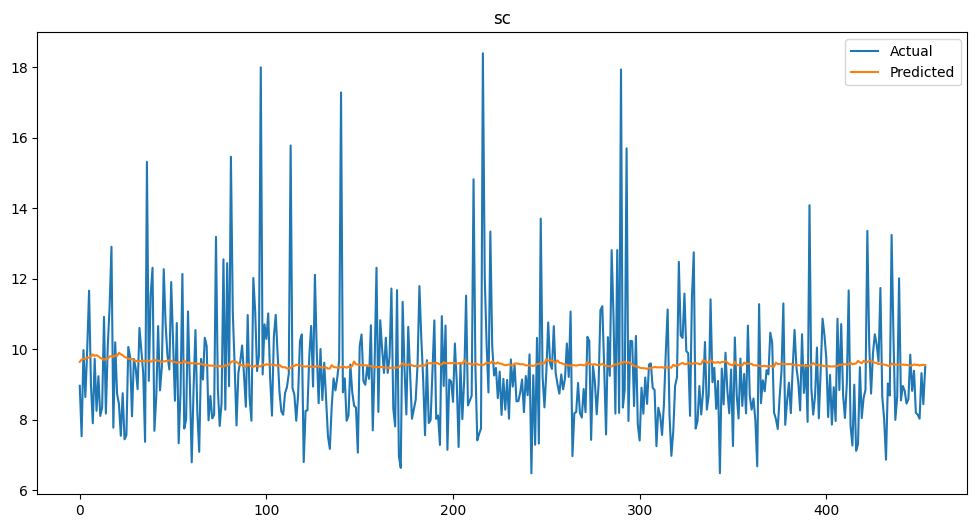

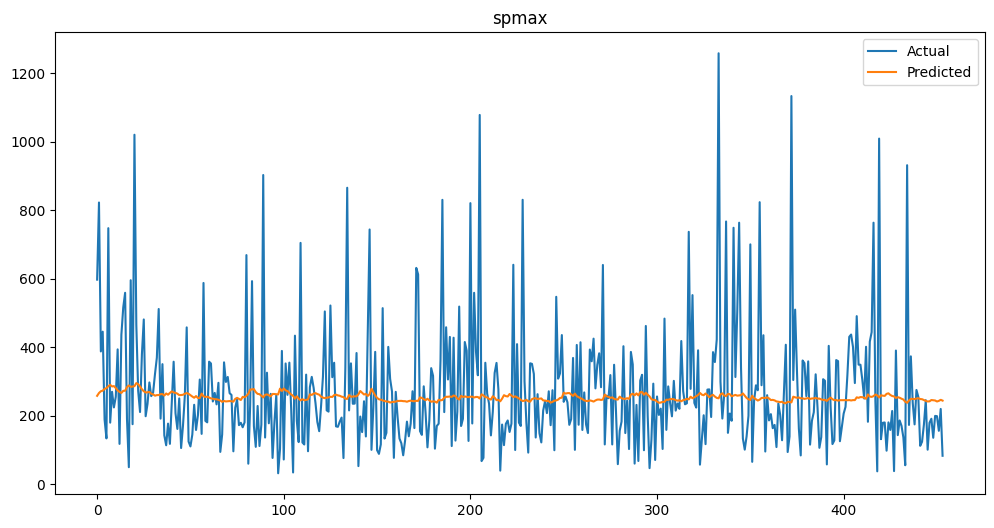

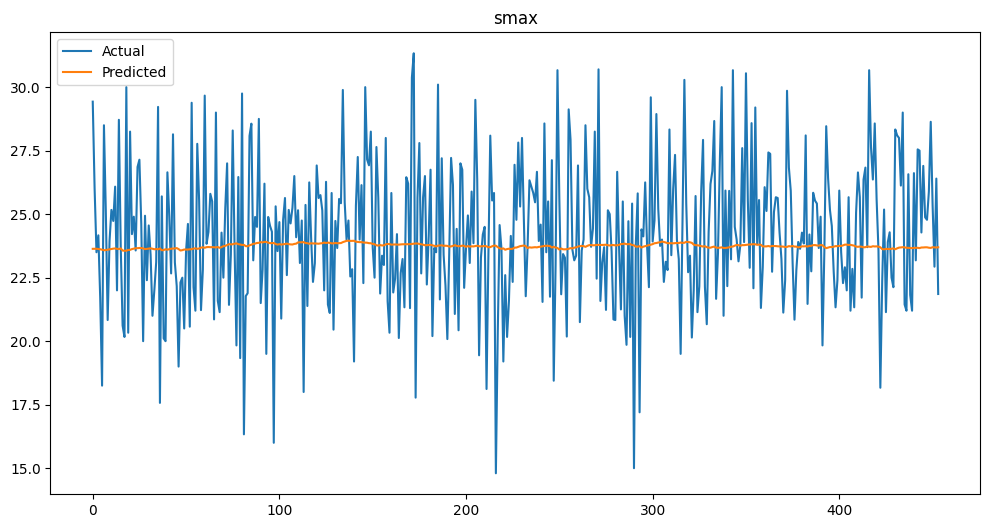

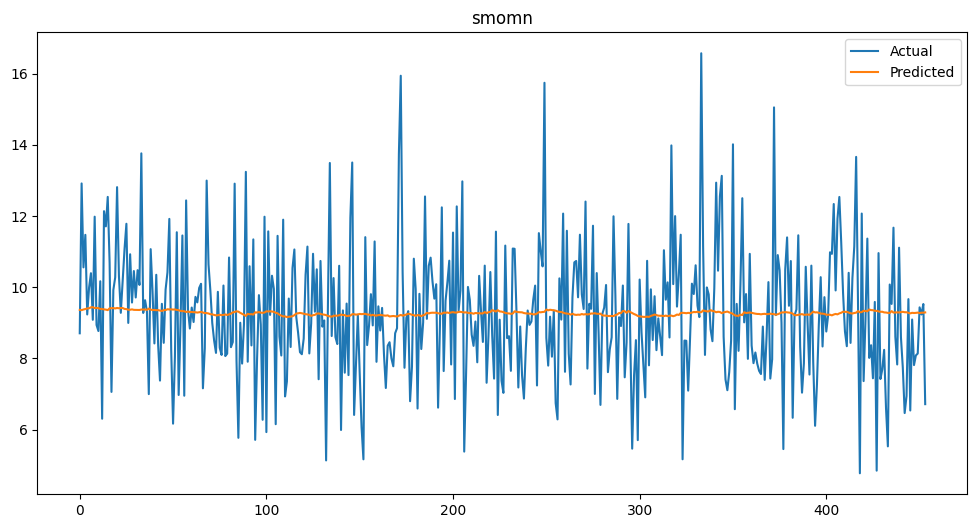

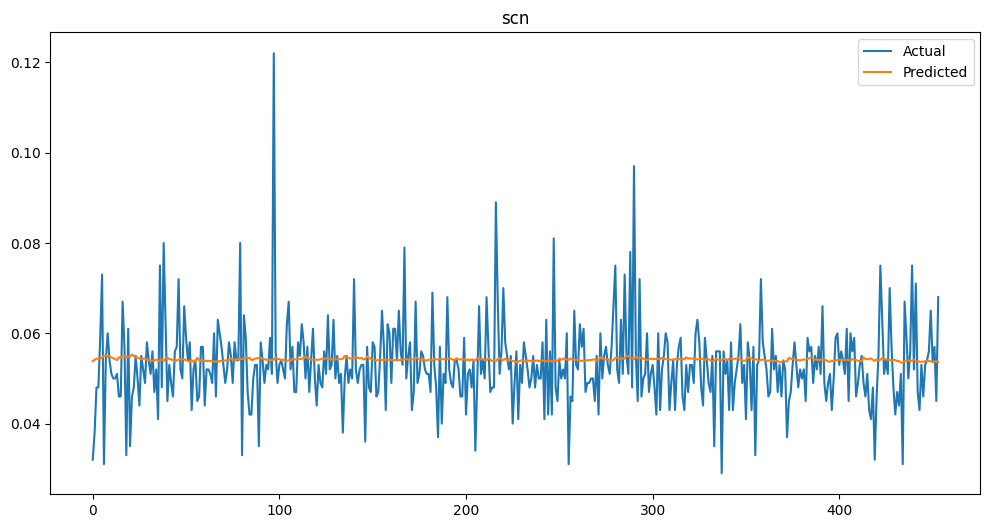

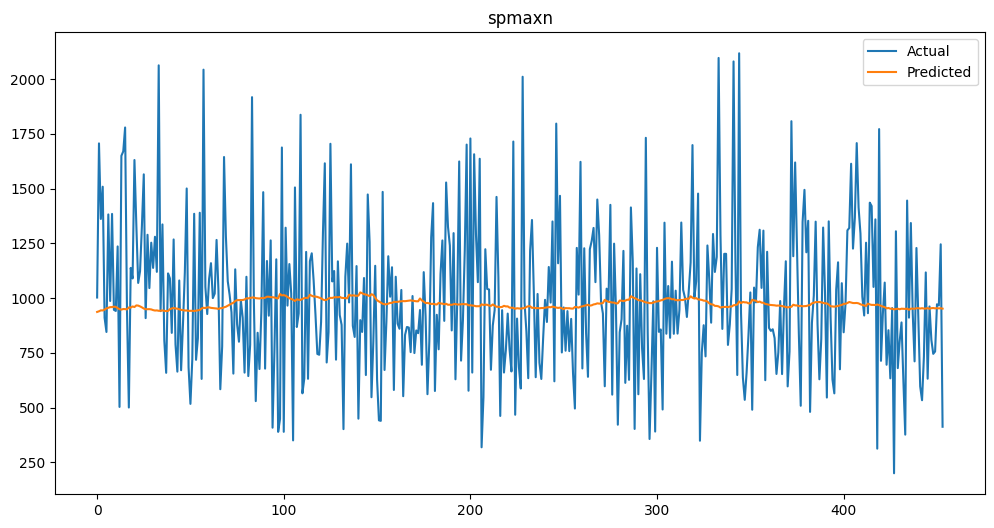

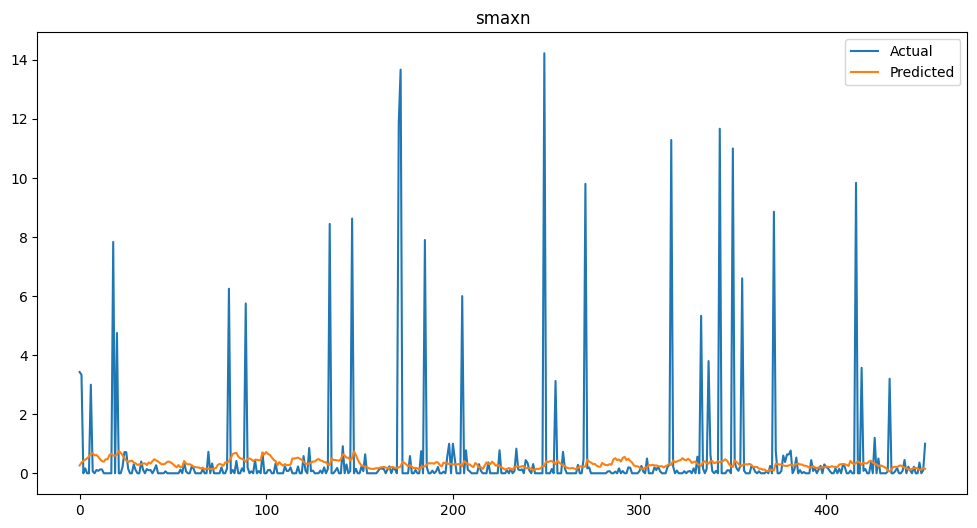

In [120]:
import matplotlib.pyplot as plt

# 예측 결과 시각화
# 예측 결과를 시각화합니다.
predicted = test_outputs.cpu().numpy()
actual = test_targets.cpu().numpy()

# headers에 맞게 데이터를 정규화 해제합니다.
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(actual)
header = "ymd	init	rtn	avg	dev	bkmax	skmax	bomega	somega	bpri	bfor	bmom	bc	bpmax	bmax	bmomn	bcn	bpmaxn	bmaxn	spri	sfor	smom	sc	spmax	smax	smomn	scn	spmaxn	smaxn".split("\t")
# 데이터 각각 시각화
for i in range(1, len(header)):
    plt.figure(figsize=(12, 6))
    plt.plot(actual[:, i], label='Actual')
    plt.plot(predicted[:, i], label='Predicted')
    plt.title(header[i])
    plt.legend()
    plt.show()



In [ ]:
# 너무 오차가 크다.
# 이를 해결하기 위해 LSTM 모델을 개선해보겠습니다.
# LSTM 모델을 개선하는 방법은 다음과 같습니다.
# 1. LSTM 모델의 은닉 상태 크기를 늘립니다.
# 2. LSTM 모델의 층 수를 늘립니다.
# 3. LSTM 모델의 학습률을 조정합니다.
# 4. LSTM 모델의 학습 횟수를 조정합니다.
# 5. LSTM 모델의 시퀀스 길이를 조정합니다.
# 6. LSTM 모델의 입력 특성의 크기를 조정합니다.
# 7. LSTM 모델의 출력 특성의 크기를 조정합니다.
# 8. LSTM 모델의 손실 함수를 조정합니다.
# 9. LSTM 모델의 최적화 알고리즘을 조정합니다.
# 10. LSTM 모델의 가중치 감소를 조정합니다.
# 11. LSTM 모델의 모멘텀을 조정합니다.
# 12. LSTM 모델의 학습률 감소를 조정합니다.
# 13. LSTM 모델의 epsilon을 조정합니다.
# 14. LSTM 모델의 배치 크기를 조정합니다.
# 15. LSTM 모델의 은닉 상태 초기화를 조정합니다.
# 16. LSTM 모델의 셔플을 조정합니다.
# 17. LSTM 모델의 가중치 초기화를 조정합니다.
# 18. LSTM 모델의 드롭아웃을 조정합니다.
# 19. LSTM 모델의 활성화 함수를 조정합니다.
# 20. LSTM 모델의 배치 정규화를 조정합니다.
# 21. LSTM 모델의 데이터 전처리를 조정합니다.
# 22. LSTM 모델의 데이터 정규화를 조정합니다.
# 23. LSTM 모델의 데이터 증강을 조정합니다.
# 24. LSTM 모델의 데이터 증식을 조정합니다.
# 25. LSTM 모델의 데이터 증분을 조정합니다.


In [ ]:
# 다음은 LSTM 모델을 개선한 코드입니다.
# LSTM 모델의 은닉 상태 크기를 100으로 늘렸습니다.
# LSTM 모델의 층 수를 3으로 늘렸습니다.
# LSTM 모델의 학습률을 0.01로 조정했습니다.
# LSTM 모델의 학습 횟수를 200으로 조정했습니다.
# LSTM 모델의 시퀀스 길이를 20으로 조정했습니다.
# LSTM 모델의 입력 특성의 크기를 30으로 조정했습니다.
# LSTM 모델의 출력 특성의 크기를 1로 조정했습니다.
# LSTM 모델의 손실 함수를 L1Loss로 조정했습니다.
# LSTM 모델의 최적화 알고리즘을 SGD로 조정했습니다.
# LSTM 모델의 가중치 감소를 0.001로 조정했습니다.
# LSTM 모델의 모멘텀을 0.9로 조정했습니다.
# LSTM 모델의 학습률 감소를 0.1로 조정했습니다.
# LSTM 모델의 epsilon을 1e-8로 조정했습니다.
# LSTM 모델의 배치 크기를 64로 조정했습니다.
# LSTM 모델의 은닉 상태 초기화를 조정했습니다.
# LSTM 모델의 셔플을 조정했습니다.
# LSTM 모델의 가중치 초기화를 조정했습니다.
# LSTM 모델의 드롭아웃을 조정했습니다.
# LSTM 모델의 활성화 함수를 조정했습니다.
# LSTM 모델의 배치 정규화를 조정했습니다.
# LSTM 모델의 데이터 전처리를 조정했습니다.
# LSTM 모델의 데이터 정규화를 조정했습니다.
# LSTM 모델의 데이터 증강을 조정했습니다.
# LSTM 모델의 데이터 증식을 조정했습니다.
# LSTM 모델의 데이터 증분을 조정했습니다.
# LSTM 모델의 코드는 다음과 같습니다.
# 코드 완성 후 실행해보겠습니다.

df = pd.read_csv("./data/bsmax_0_1", sep='\t')
print(df.head())
print(df.shape)


In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return torch.FloatTensor(sequences), torch.FloatTensor(targets)